In [1]:
from tensorflow.keras import layers, models
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset) # this will return 68 because batch size=32 and 32*68 ~ 2152

68

In [7]:
dir(dataset)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_convert_variables_to_tensors',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_drop_remainder',
 '_export_to_saved_model_graph',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_g

In [8]:
for images_batch, label_batch in dataset.take(1): # .take(1) takes 1 batch of images
    print(images_batch.shape) # shape = (32, 256, 256, 3); 32 images each 256x256 and has 3 values for RGB
    print(label_batch.numpy())
    print(len(label_batch.numpy()))

(32, 256, 256, 3)
[0 1 1 0 2 0 1 1 1 1 0 1 1 0 0 0 1 1 2 1 1 0 1 0 1 1 0 1 1 0 0 1]
32


In [9]:
for images_batch, label_batch in dataset.take(1):
    print(images_batch[0].numpy())

[[[158. 160. 173.]
  [159. 161. 174.]
  [160. 162. 175.]
  ...
  [190. 193. 202.]
  [192. 195. 204.]
  [195. 198. 207.]]

 [[172. 174. 187.]
  [166. 168. 181.]
  [161. 163. 176.]
  ...
  [189. 192. 201.]
  [190. 193. 202.]
  [191. 194. 203.]]

 [[174. 176. 189.]
  [170. 172. 185.]
  [166. 168. 181.]
  ...
  [193. 196. 205.]
  [193. 196. 205.]
  [192. 195. 204.]]

 ...

 [[114. 111. 122.]
  [118. 115. 126.]
  [124. 121. 132.]
  ...
  [131. 127. 141.]
  [138. 134. 148.]
  [130. 126. 140.]]

 [[114. 111. 122.]
  [117. 114. 125.]
  [120. 117. 128.]
  ...
  [137. 133. 147.]
  [142. 138. 152.]
  [132. 128. 142.]]

 [[110. 107. 118.]
  [111. 108. 119.]
  [113. 110. 121.]
  ...
  [136. 132. 146.]
  [139. 135. 149.]
  [125. 121. 135.]]]


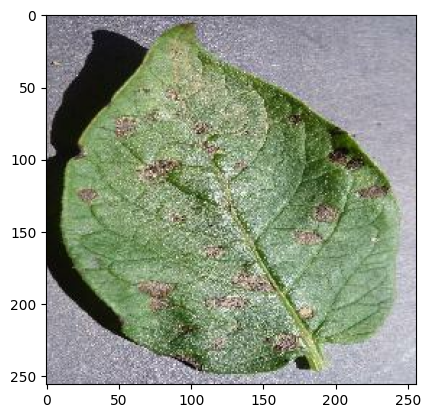

In [10]:
for images_batch, label_batch in dataset.take(1):
    plt.imshow(images_batch[0].numpy().astype("uint8")) # the array is originally float. So need to convert to int

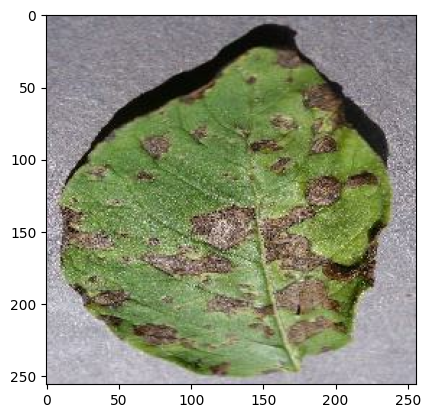

In [11]:
for images_batch, label_batch in dataset.take(1):
    for i in list(images_batch):
        plt.imshow(i.numpy().astype("uint8"))

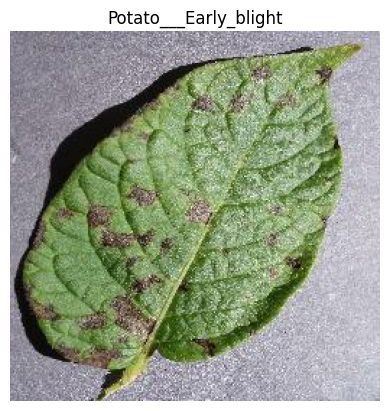

In [12]:
for images_batch, label_batch in dataset.take(1):
    plt.imshow(images_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

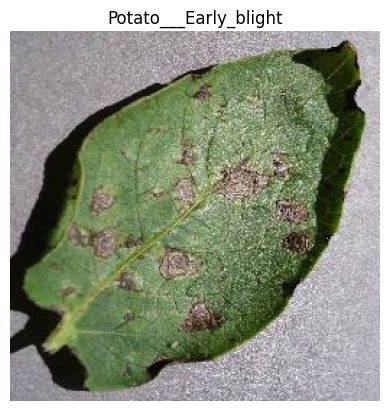

In [13]:
for images_batch, label_batch in dataset.take(1): #This code is giving 1 image because there is only 1 canvas in this code. We need subplot for that
    for i in range(20):
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

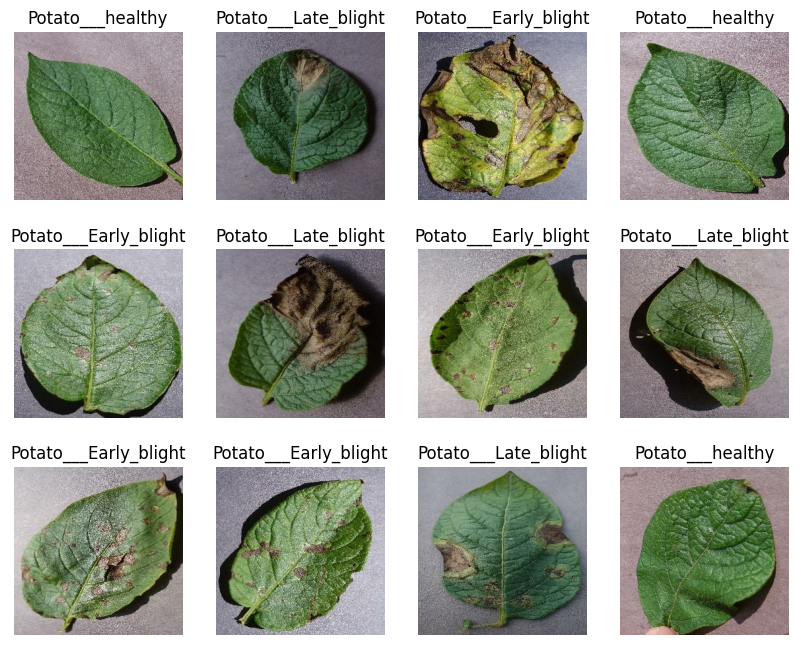

In [14]:
plt.figure(figsize=(10, 8))

for images_batch, label_batch in dataset.take(1):
    for i in range(1,13):
        ax = plt.subplot(3,4,i) # this method doesn't take 0
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [15]:
len(dataset)

68

In [16]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [17]:
# So, taking 54 batches as train set
import math
train_dataset = dataset.take(math.floor(len(dataset)*train_size))

In [18]:
test_ds = dataset.skip(math.floor(len(dataset)*train_size))
len(test_ds)

14

In [19]:
len(train_dataset)

54

In [20]:
val_size = 0.5

val_ds = test_ds.take(math.floor(len(test_ds)*val_size))

test_ds = test_ds.skip(math.floor(len(test_ds)*val_size))

(len(val_ds), len(test_ds))

(7, 7)

In [21]:
def get_ds_partitions(ds, train_size=0.8, val_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):
    len_ds = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_ds = ds.take(math.floor(len_ds*train_size))
    
    val_ds = ds.skip(math.floor(len_ds*train_size)).take(math.floor(len_ds*val_size))
    
    test_ds = ds.skip(math.floor(len_ds*train_size)).skip(math.floor(len_ds*val_size))
    
    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds = get_ds_partitions(dataset)

In [23]:
len(train_ds), len(test_ds), len(val_ds)

(54, 8, 6)

In [24]:
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
resize_and_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [26]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [27]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
num_classes = 3 # healthy, late blight, early blight

model = models.Sequential([
    resize_and_scale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [29]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [30]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/50
54/54 [==============================] - 27s 212ms/step - loss: 0.7910 - accuracy: 0.6273 - val_loss: 1.1608 - val_accuracy: 0.7396
Epoch 2/50
54/54 [==============================] - 10s 191ms/step - loss: 0.4165 - accuracy: 0.8339 - val_loss: 0.2590 - val_accuracy: 0.8958
Epoch 3/50
54/54 [==============================] - 10s 190ms/step - loss: 0.2699 - accuracy: 0.8912 - val_loss: 0.2456 - val_accuracy: 0.8646
Epoch 4/50
54/54 [==============================] - 11s 195ms/step - loss: 0.2191 - accuracy: 0.9184 - val_loss: 0.1881 - val_accuracy: 0.9427
Epoch 5/50
54/54 [==============================] - 12s 214ms/step - loss: 0.2671 - accuracy: 0.9080 - val_loss: 0.2209 - val_accuracy: 0.9375
Epoch 6/50
54/54 [==============================] - 12s 225ms/step - loss: 0.1680 - accuracy: 0.9416 - val_loss: 0.1430 - val_accuracy: 0.9583
Epoch 7/50
54/54 [==============================] - 12s 214ms/step - loss: 0.2286 - accuracy: 0.9184 - val_loss: 0.3013 - val_accuracy: 0.8750

In [31]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 27ms/step - loss: 0.0704 - accuracy: 0.9805


In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
history.history['accuracy']

[0.6273148059844971,
 0.8339120149612427,
 0.8912037014961243,
 0.9184027910232544,
 0.9079861044883728,
 0.9415509104728699,
 0.9184027910232544,
 0.9432870149612427,
 0.9623842835426331,
 0.9635416865348816,
 0.9670138955116272,
 0.9606481194496155,
 0.9600694179534912,
 0.9664351940155029,
 0.9733796119689941,
 0.9704861044883728,
 0.9733796119689941,
 0.9658564925193787,
 0.9635416865348816,
 0.9710648059844971,
 0.9699074029922485,
 0.9699074029922485,
 0.9774305820465088,
 0.9670138955116272,
 0.9710648059844971,
 0.9837962985038757,
 0.9745370149612427,
 0.9832175970077515,
 0.9918981194496155,
 0.9756944179534912,
 0.9820601940155029,
 0.9913194179534912,
 0.9942129850387573,
 0.9849537014961243,
 0.9837962985038757,
 0.9895833134651184,
 0.9947916865348816,
 0.9745370149612427,
 0.9890046119689941,
 0.9942129850387573,
 0.9947916865348816,
 0.9942129850387573,
 0.9728009104728699,
 0.9803240895271301,
 0.9936342835426331,
 0.9699074029922485,
 0.9797453880310059,
 0.9826388955

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

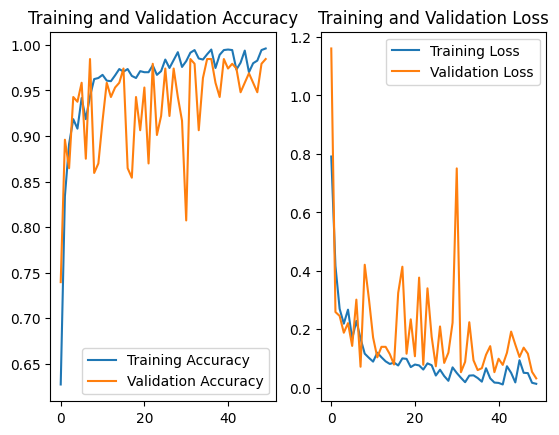

In [37]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

first image to predict
actual label:  Potato___Late_blight
1/1 [==============================] - 0s 171ms/step
Potato___Late_blight


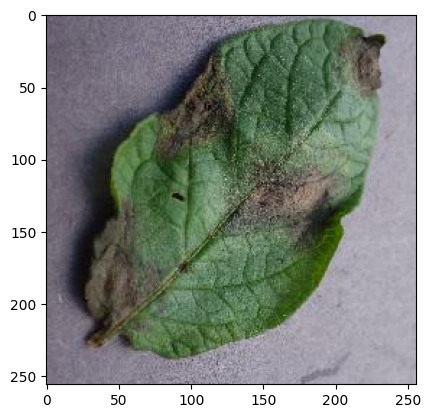

In [38]:
import numpy as np

for img_batch, label_batch in test_ds.take(1):
    image = img_batch[0].numpy().astype("uint8")
    label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(image)
    print("actual label: ", class_names[label])
    
    batch_pred = model.predict(img_batch)
    print(class_names[np.argmax(batch_pred[0])])

In [39]:
def prediction_comp(img_number):
    for img_batch, label_batch in test_ds.take(1):
        img = img_batch[img_number].numpy().astype("uint8")
        label = label_batch[img_number].numpy()
        
        print(f"""{img_number} number image to predict \n actual label: {class_names[label]} \n Predicted: {class_names[np.argmax(model.predict(img_batch)[img_number])]}""")
        plt.imshow(img)

1/1 [==============================] - 0s 29ms/step
4 number image to predict 
 actual label: Potato___healthy 
 Predicted: Potato___healthy


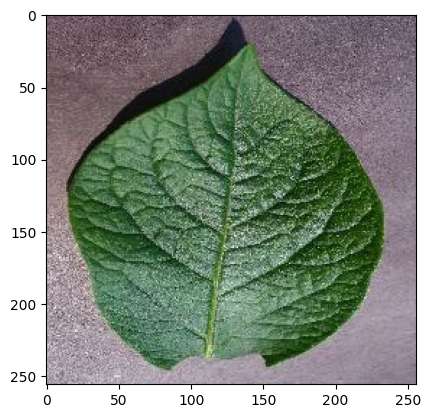

In [40]:
prediction_comp(4)

In [42]:
model_version = 1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets


In [46]:
import os

model_version = max([int(i) for i in os.listdir("models")]) + 1

In [47]:
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/2\assets


INFO:tensorflow:Assets written to: models/2\assets


In [48]:
[int(i) for i in os.listdir("models")]

[1, 2]

In [3]:
tf.test.is_gpu_available()

AttributeError: module 'tensorflow' has no attribute 'test'